In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.108.49.114:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.108.49.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.108.49.114:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [1]:
!pip3 install vaderSentiment

     |████████████████████████████████| 133kB 6.9MB/s 


In [2]:
!pip3 install torch
!pip3 install transformers

     |████████████████████████████████| 1.3MB 6.9MB/s 
     |████████████████████████████████| 2.9MB 17.4MB/s 
     |████████████████████████████████| 1.1MB 47.2MB/s 
     |████████████████████████████████| 890kB 55.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=fe95ff88791e031be42e766181192485a324c8f30eb111819fae95788450fb02
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,FeatureUnion
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from nltk.cluster import KMeansClusterer,cosine_distance, euclidean_distance
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.regularizers import l2
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,CSVLogger

import torch
import transformers as ppb # pytorch transformers

In [4]:
#!pip3 install spacy-transformers

In [7]:
!python3 -m spacy download en_trf_bertbaseuncased_lg

     |████████████████████████████████| 405.8MB 1.1MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 573kB 9.6MB/s 
     |████████████████████████████████| 245kB 62.7MB/s 
     |████████████████████████████████| 71kB 53.2MB/s 
     |████████████████████████████████| 133kB 49.1MB/s 
     |████████████████████████████████| 3.7MB 37.6MB/s 
     |████████████████████████████████| 71kB 60.2MB/s 
     |████████████████████████████████| 6.8MB 56.0MB/s 
  Created wheel for en-trf-bertbaseuncased-lg: filename=en_trf_bertbaseuncased_lg-2.2.0-cp36-none-any.whl size=405819948 sha256=97ab0cabc49e898e061b0c10783f4ae214438cc2d2777470bbd9ff9720b9af35
  Stored in directory: /tmp/pip-ephem-wheel-cache-eqfytzwh/wheels/f6/60/8c/c6f517ef9729972f1be15c3aab4b93e7ec9fbeb71d072a84de
  Created wheel for torchcontrib: filename=torchcontrib-0.0.2-cp36-none-any.whl size=7533 sha256=3f5f55a2f2323618e5682d6164b9257cdfa65a89c954c266460a040a4e99354b
  Stored in directo

In [8]:
import spacy
import pandas as pd

Let's test it to see if it's working well.

In [12]:
product_reviews_ratings=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/pre_processed_data.csv')

In [13]:
product_reviews_ratings.head(2)

,asin,overall,verified,reviewText,reviewTime
0,0007444117,1,False,I was a huge fan when the Divergent series sta...,2016-09-03
1,0007177437,4,True,Excellent read.,2015-09-16


In [17]:
#Let's select only 3 star reviews
verified_1_3_stars=product_reviews_ratings[(product_reviews_ratings['overall']!=5)&(product_reviews_ratings['overall']!=4)&(product_reviews_ratings['verified']==True)]

In [22]:
#Let's just take the first 10_000 rows to test for feasibility.
reviews_ratings_selection=verified_1_3_stars.loc[:50_000]

In [23]:
reviews_ratings_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5639 entries, 19 to 49997
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   asin        5639 non-null   object
 1   overall     5639 non-null   int64 
 2   verified    5639 non-null   bool  
 3   reviewText  5637 non-null   object
 4   reviewTime  5639 non-null   object
dtypes: bool(1), int64(1), object(3)
memory usage: 225.8+ KB


In [25]:
del reviews_ratings
del verified_1_3_stars
gc.collect()

NameError: ignored

In [26]:
#parameters for tokenization
max_len=450
training_samples=5000
validation_samples=637
max_words=1_500

In [27]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

In [28]:
#instantiate the tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [29]:
text_data=reviews_ratings_selection['reviewText'].astype('str')

In [30]:
#instantiate instance of Vader sentiment analyzer
sentiment=SentimentIntensityAnalyzer()
#using vader sentiment analyzer for a second input
df=pd.DataFrame(text_data)
#df['polarity']=sentiment.polarity_scores(df['reviewText'][:200])
df_polarity=pd.DataFrame([sentiment.polarity_scores(df.loc[:,'reviewText'][i][-300:]) for i in df.index])

In [31]:
df_polarity_input=df_polarity.iloc[:,:3]

In [32]:
#tokenized = df.loc[:,'reviewText'][i][:200].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
df_to_tokenize=pd.DataFrame([df.loc[:,'reviewText'][i][:max_len] for i in df.index])
df_to_tokenize

,0
0,"I got a used copy, but it has a great message ..."
1,Great reference guide for any day writing; sc...
2,no comment
3,We purchased it for school project. It is a ch...
4,"After the first book, this one was disappointi..."
...,...
5634,"Since I am a passionate reader and a writer, b..."
5635,This has always been my favorite Dr. Seuss boo...
5636,"I liked the way it started, and the story wasn..."
5637,"Hemingway was an interesting man, but his writ..."


In [33]:
tokenized = df_to_tokenize[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))


In [34]:
#padding
#max_len = 0
#for i in tokenized.values:
#    if len(i) > max_len:
#        max_len = len(i)

#padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [35]:
#fit the tokenizer
#tokenizer.fit_on_texts(text_data)

In [36]:
#create the sequences
#sequences=tokenizer.texts_to_sequences(text_data)
#sequences=tokenizer.texts_to_sequences(tokenized)

In [37]:
#pad sequences
#padded_data=pad_sequences(tokenized,maxlen=max_len) #to be able to handle docs too small to feed.

In [38]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded_data = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [39]:
padded_data.shape

(5639, 154)

In [40]:
attention_mask = np.where(padded_data != 0, 1, 0)
attention_mask.shape

(5639, 154)

In [41]:
type(padded_data)

numpy.ndarray

In [42]:
input_ids = torch.tensor(padded_data)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask)

In [43]:
data = last_hidden_states[0][:,0,:].numpy()

In [44]:
data.shape

(5639, 768)

In [45]:
ss=StandardScaler()
data=ss.fit_transform(data)

In [46]:
#y is rating (here referred to as 'overall')
y=reviews_ratings_selection['overall']

In [47]:
#let's reset index of y and then subtract 1 as an offset so that tf.keras.utils.to_categorical works. 
#We'll have to add 1 to model output to retrieve actual label.
 
y=y.reset_index()['overall']
y=y-1

In [49]:
#Let's check if y encodes properly with the offset.
tf.keras.utils.to_categorical(y)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [50]:
#create train/test sets
X_train=data[:training_samples]
df_polarity_train=df_polarity_input[:training_samples]
X_test=data[training_samples:training_samples+validation_samples]
df_polarity_test=df_polarity_input[training_samples:training_samples+validation_samples]

y_train=y[:training_samples]
y_train_categorical=tf.keras.utils.to_categorical(y_train)[:,:]  #dropping first column
y_train_categorical[:4]
y_test=y[training_samples:training_samples+validation_samples]
y_test_categorical=tf.keras.utils.to_categorical(y_test)[:,:]  #dropping first column
y_test_categorical[:100]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0

In [51]:
y_test[90:100]

5090    0
5091    2
5092    0
5093    2
5094    1
5095    1
5096    2
5097    1
5098    0
5099    2
Name: overall, dtype: int64

In [52]:
df_polarity_input

,neg,neu,pos
0,0.128,0.612,0.260
1,0.000,0.687,0.313
2,0.688,0.312,0.000
3,0.000,0.915,0.085
4,0.133,0.718,0.149
...,...,...,...
5634,0.121,0.833,0.046
5635,0.030,0.839,0.131
5636,0.000,0.863,0.137
5637,0.230,0.625,0.145


Thus, ratings 1,2,3,4,5 correspond to labels 0,1,2,3,4 respectively.

In [53]:
#simple network model
#model=Sequential()
#model.add(Dense(64,activation='relu'))
#model.add(Dense(1,activation='linear'))

In [54]:
X_train.shape

(5000, 768)

In [86]:
input_A = keras.layers.Input(shape=(768,1))
input_B = keras.layers.Input(shape=(3, ))
batch_normalization=keras.layers.BatchNormalization()(input_A)
hidden0=keras.layers.LSTM(units=768, input_shape=(768,1))(batch_normalization)
hidden1=keras.layers.Dense(1536,activation='relu',kernel_regularizer=l2(0))(hidden0)
hidden2=keras.layers.Dense(800,activation='relu',kernel_regularizer=l2(0))(hidden1)
hidden3=keras.layers.Dense(800,activation='relu',kernel_regularizer=l2(0))(hidden2)
hidden4=keras.layers.Dense(200,activation='relu',kernel_regularizer=l2(0))(hidden3)
hidden5=keras.layers.Dense(100,activation='relu',kernel_regularizer=l2(0))(hidden4)
hidden6=keras.layers.Dense(50,activation='relu',kernel_regularizer=l2(0))(hidden5)
concat=keras.layers.concatenate([hidden1,hidden2,hidden6])
hidden7=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(concat)
hidden8=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(hidden7)
concat2=keras.layers.concatenate([hidden0,hidden8,input_B])
batch_normalization2=keras.layers.BatchNormalization()(concat2)
hidden9=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(batch_normalization2)
hidden10=keras.layers.Dense(25,input_shape=(25,1),activation='relu',kernel_regularizer=l2(0))(hidden9)
concat3=keras.layers.concatenate([hidden0,hidden10])
hidden11=keras.layers.Dense(64,activation='relu',kernel_regularizer=l2(0))(concat3)
hidden12=keras.layers.Dense(50,activation='relu',kernel_regularizer=l2(0))(hidden11)
hidden13=keras.layers.Dense(25,activation='relu',kernel_regularizer=l2(0))(hidden12)
output=keras.layers.Dense(3,activation='softmax')(hidden12)

model=keras.models.Model(inputs=[input_A,input_B], outputs=[output])

In [87]:
#add a callback
callback=EarlyStopping(monitor='loss',patience=5)

In [88]:
#compile
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.01), #'Adadelta',  #keras.optimizers.Adam(lr=0.00001),
    metrics=['accuracy'],
)

In [89]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 768, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 768, 1)       4           input_5[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 768)          2365440     batch_normalization_4[0][0]      
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 1536)         1181184     lstm_2[0][0]                     
_______________________________________________________________________________________

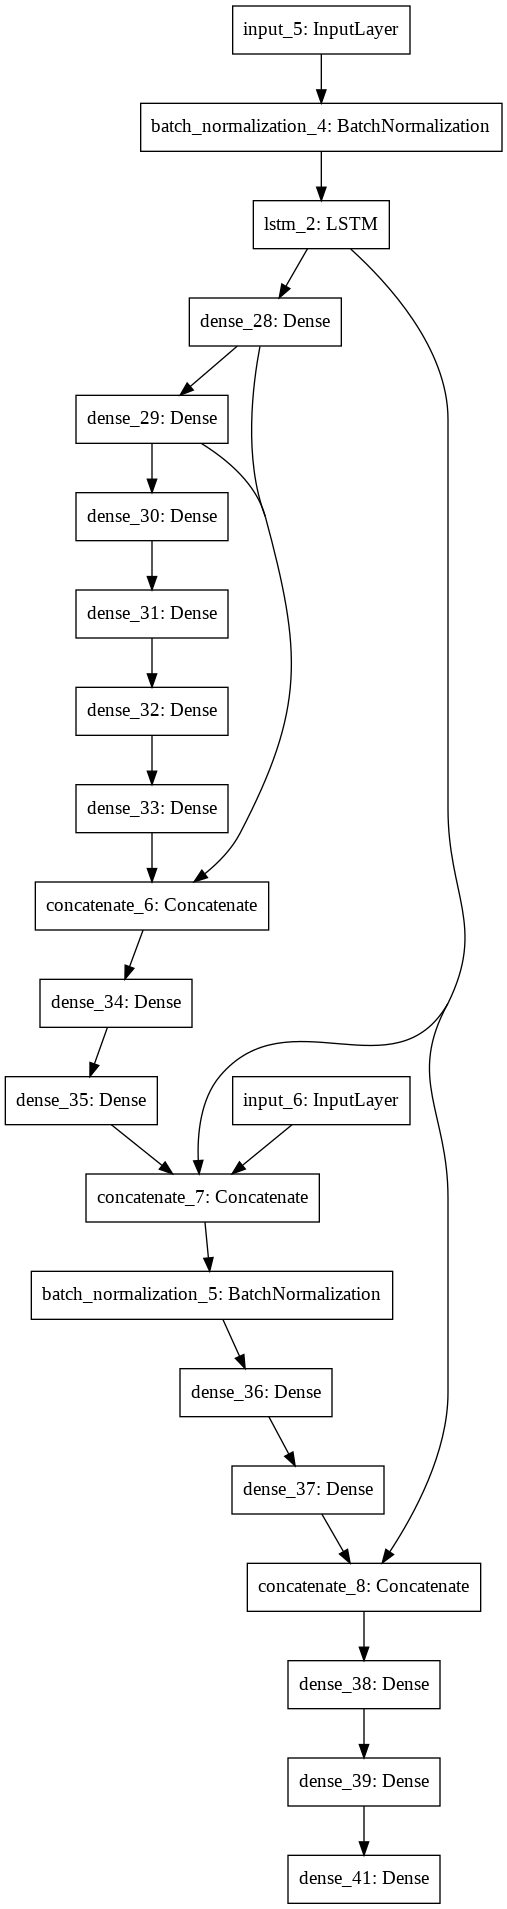

In [90]:
keras.utils.plot_model(model, "model_file_13.png")

In [91]:
#Let's perform value_count on reviews_ratings_selection by 'overall'. This will help us compute appropriate class weights for each class.
reviews_ratings_selection['overall'].value_counts(normalize=True)

3    0.508069
1    0.255719
2    0.236212
Name: overall, dtype: float64

In [92]:
class_weight = {2: 1,
                1: 1.5,
                0: 1.5
                }

#4: 2.5, 3: 4, 2: 3, 0: 3, 1: 1

In [ ]:
#fit
history=model.fit((X_train,df_polarity_train),y_train_categorical,batch_size=512,validation_data=((X_test,df_polarity_test),y_test_categorical), class_weight=class_weight,callbacks=callback,epochs=500,verbose=1)

Epoch 1/500
10/10 [==============================] - 190s 19s/step - loss: 1.5562 - accuracy: 0.4014 - val_loss: 1.6977 - val_accuracy: 0.2339
Epoch 2/500
10/10 [==============================] - 178s 18s/step - loss: 1.4789 - accuracy: 0.3738 - val_loss: 1.1551 - val_accuracy: 0.4427
Epoch 3/500
10/10 [==============================] - 180s 18s/step - loss: 1.3879 - accuracy: 0.4150 - val_loss: 1.2464 - val_accuracy: 0.4160
Epoch 4/500
10/10 [==============================] - 161s 16s/step - loss: 1.3593 - accuracy: 0.4738 - val_loss: 1.1280 - val_accuracy: 0.2386
Epoch 5/500
10/10 [==============================] - 163s 16s/step - loss: 1.3575 - accuracy: 0.4436 - val_loss: 1.1054 - val_accuracy: 0.4380
Epoch 6/500
10/10 [==============================] - 161s 16s/step - loss: 1.3462 - accuracy: 0.4888 - val_loss: 1.0604 - val_accuracy: 0.4129
Epoch 7/500
10/10 [==============================] - 166s 17s/step - loss: 1.3374 - accuracy: 0.4920 - val_loss: 1.0819 - val_accuracy: 0.3328

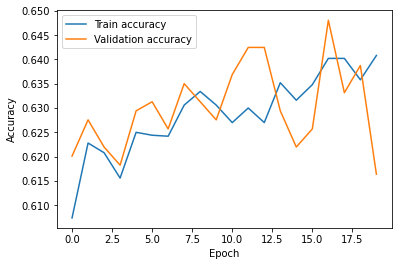

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Train accuracy')   #mae on training set
plt.plot(history.history['val_accuracy'],label='Validation accuracy');  #mae on validation set
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

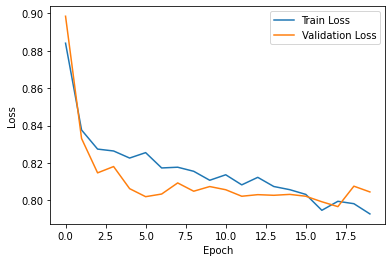

In [ ]:
plt.plot(history.history['loss'],label='Train Loss')   #mae on training set
plt.plot(history.history['val_loss'],label='Validation Loss');  #mae on validation set
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [ ]:
X_train.shape

In [ ]:
model

In [ ]:
preds=model.predict((X_test,df_polarity_test))

In [ ]:
preds

In [ ]:
preds_class=np.argmax(preds,axis=1)
preds_class+2

In [ ]:
print(classification_report(y_test,preds_class))

In [ ]:
pd.DataFrame(preds_class).value_counts()

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
model.save('/content/drive/My Drive/amazon_reviews_project/file_14_ditillbert_model')